
The idea is that we consider the the Brain_top677_NM_List file and we split it into 
three list randomly

In summary:

We start with X number of brain genes.
These genes are initially split into three groups: 85%, 10%, and 5%.
The 85% group will be further divided in the subsequent step.
The 10% is designated for evaluation.
The 5% is reserved for benchmark genes (prediction task).
Considering the 85% group as 100%, it's then split into two groups: 80% for training the model and 20% for testing the model.
By adopting this percentage-based approach, we can maintain a universal standard ratio for splitting, providing flexibility and steering clear of rigid numerical constraints.


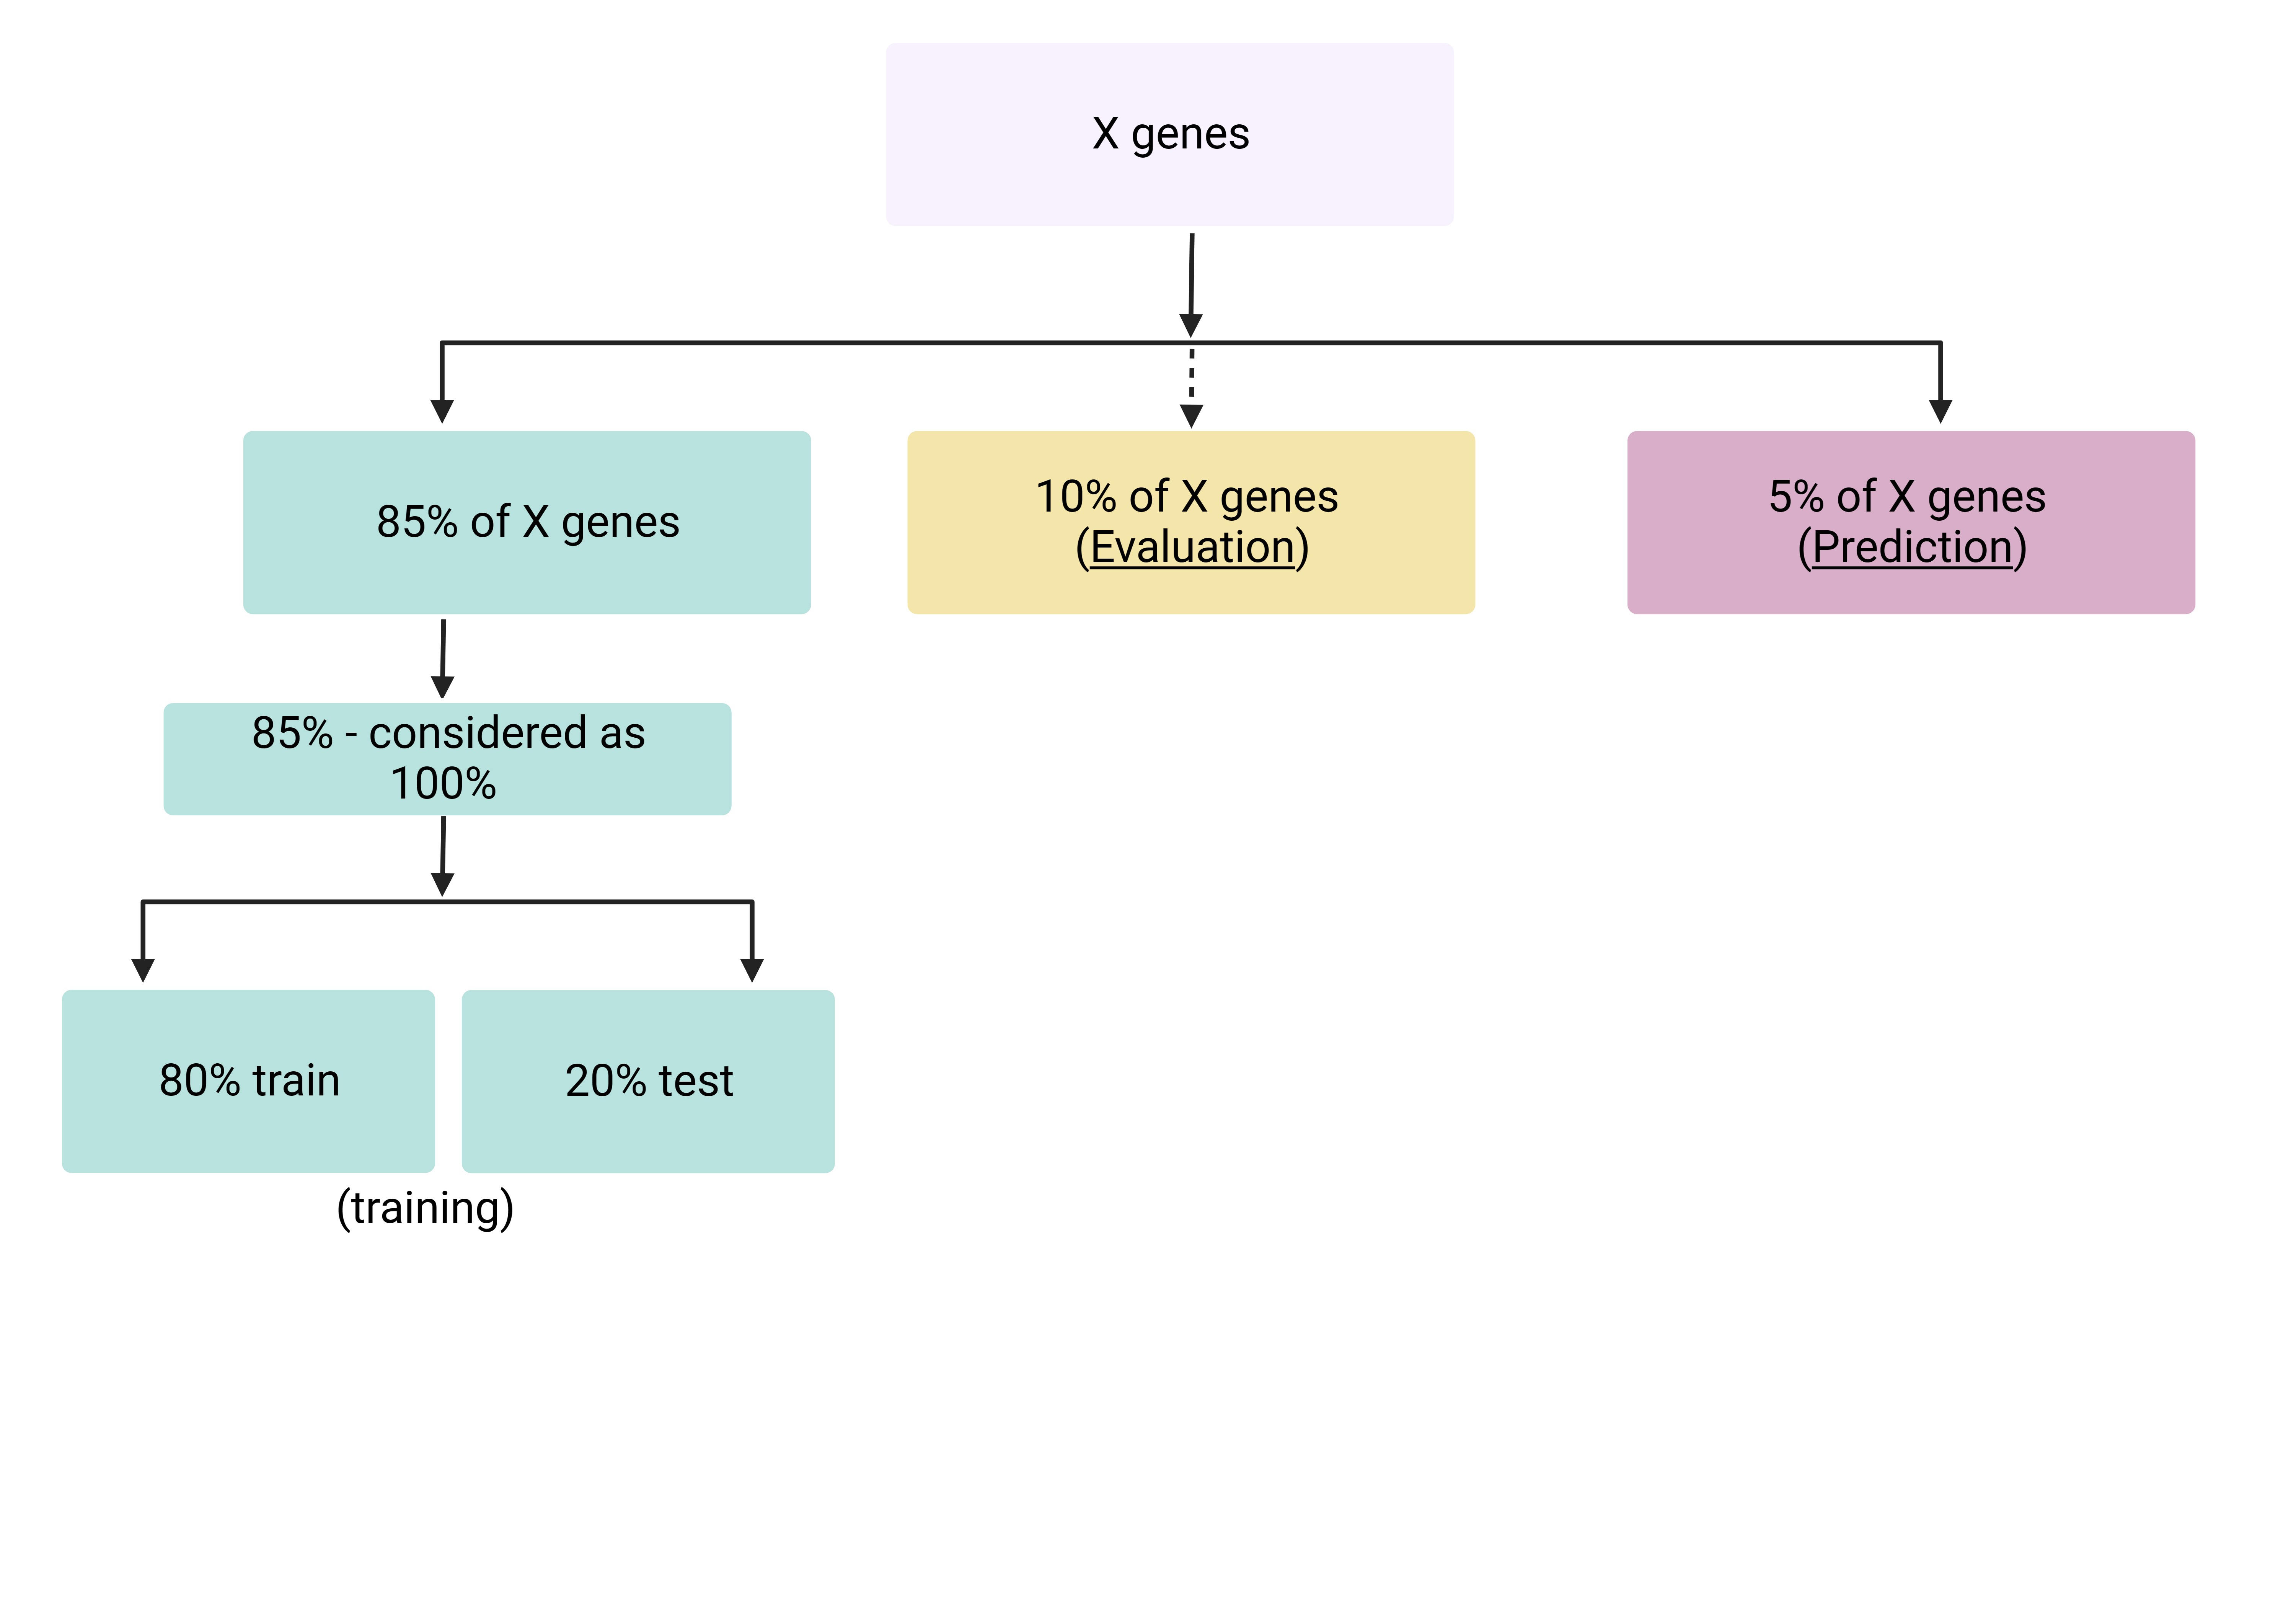


first step is use the Brain_top677_NM_List file and we split it into three list randomly
1. train_NM_list
2. eval_NM_list
3. predict_NM_list

save these in the corresponding folders 

for each of the training,evaluation and prediction genes, use the following steps :
#use the NM_ids saved in each of the corresponding training,evaluation and prediction folder to get the 
sequences and save it in fasta files - trainingseq.fasta,evalseq.fasta,predictseq.fasta

#then once you have the corresponding fasta files in each folder, do the pre-processing of the 

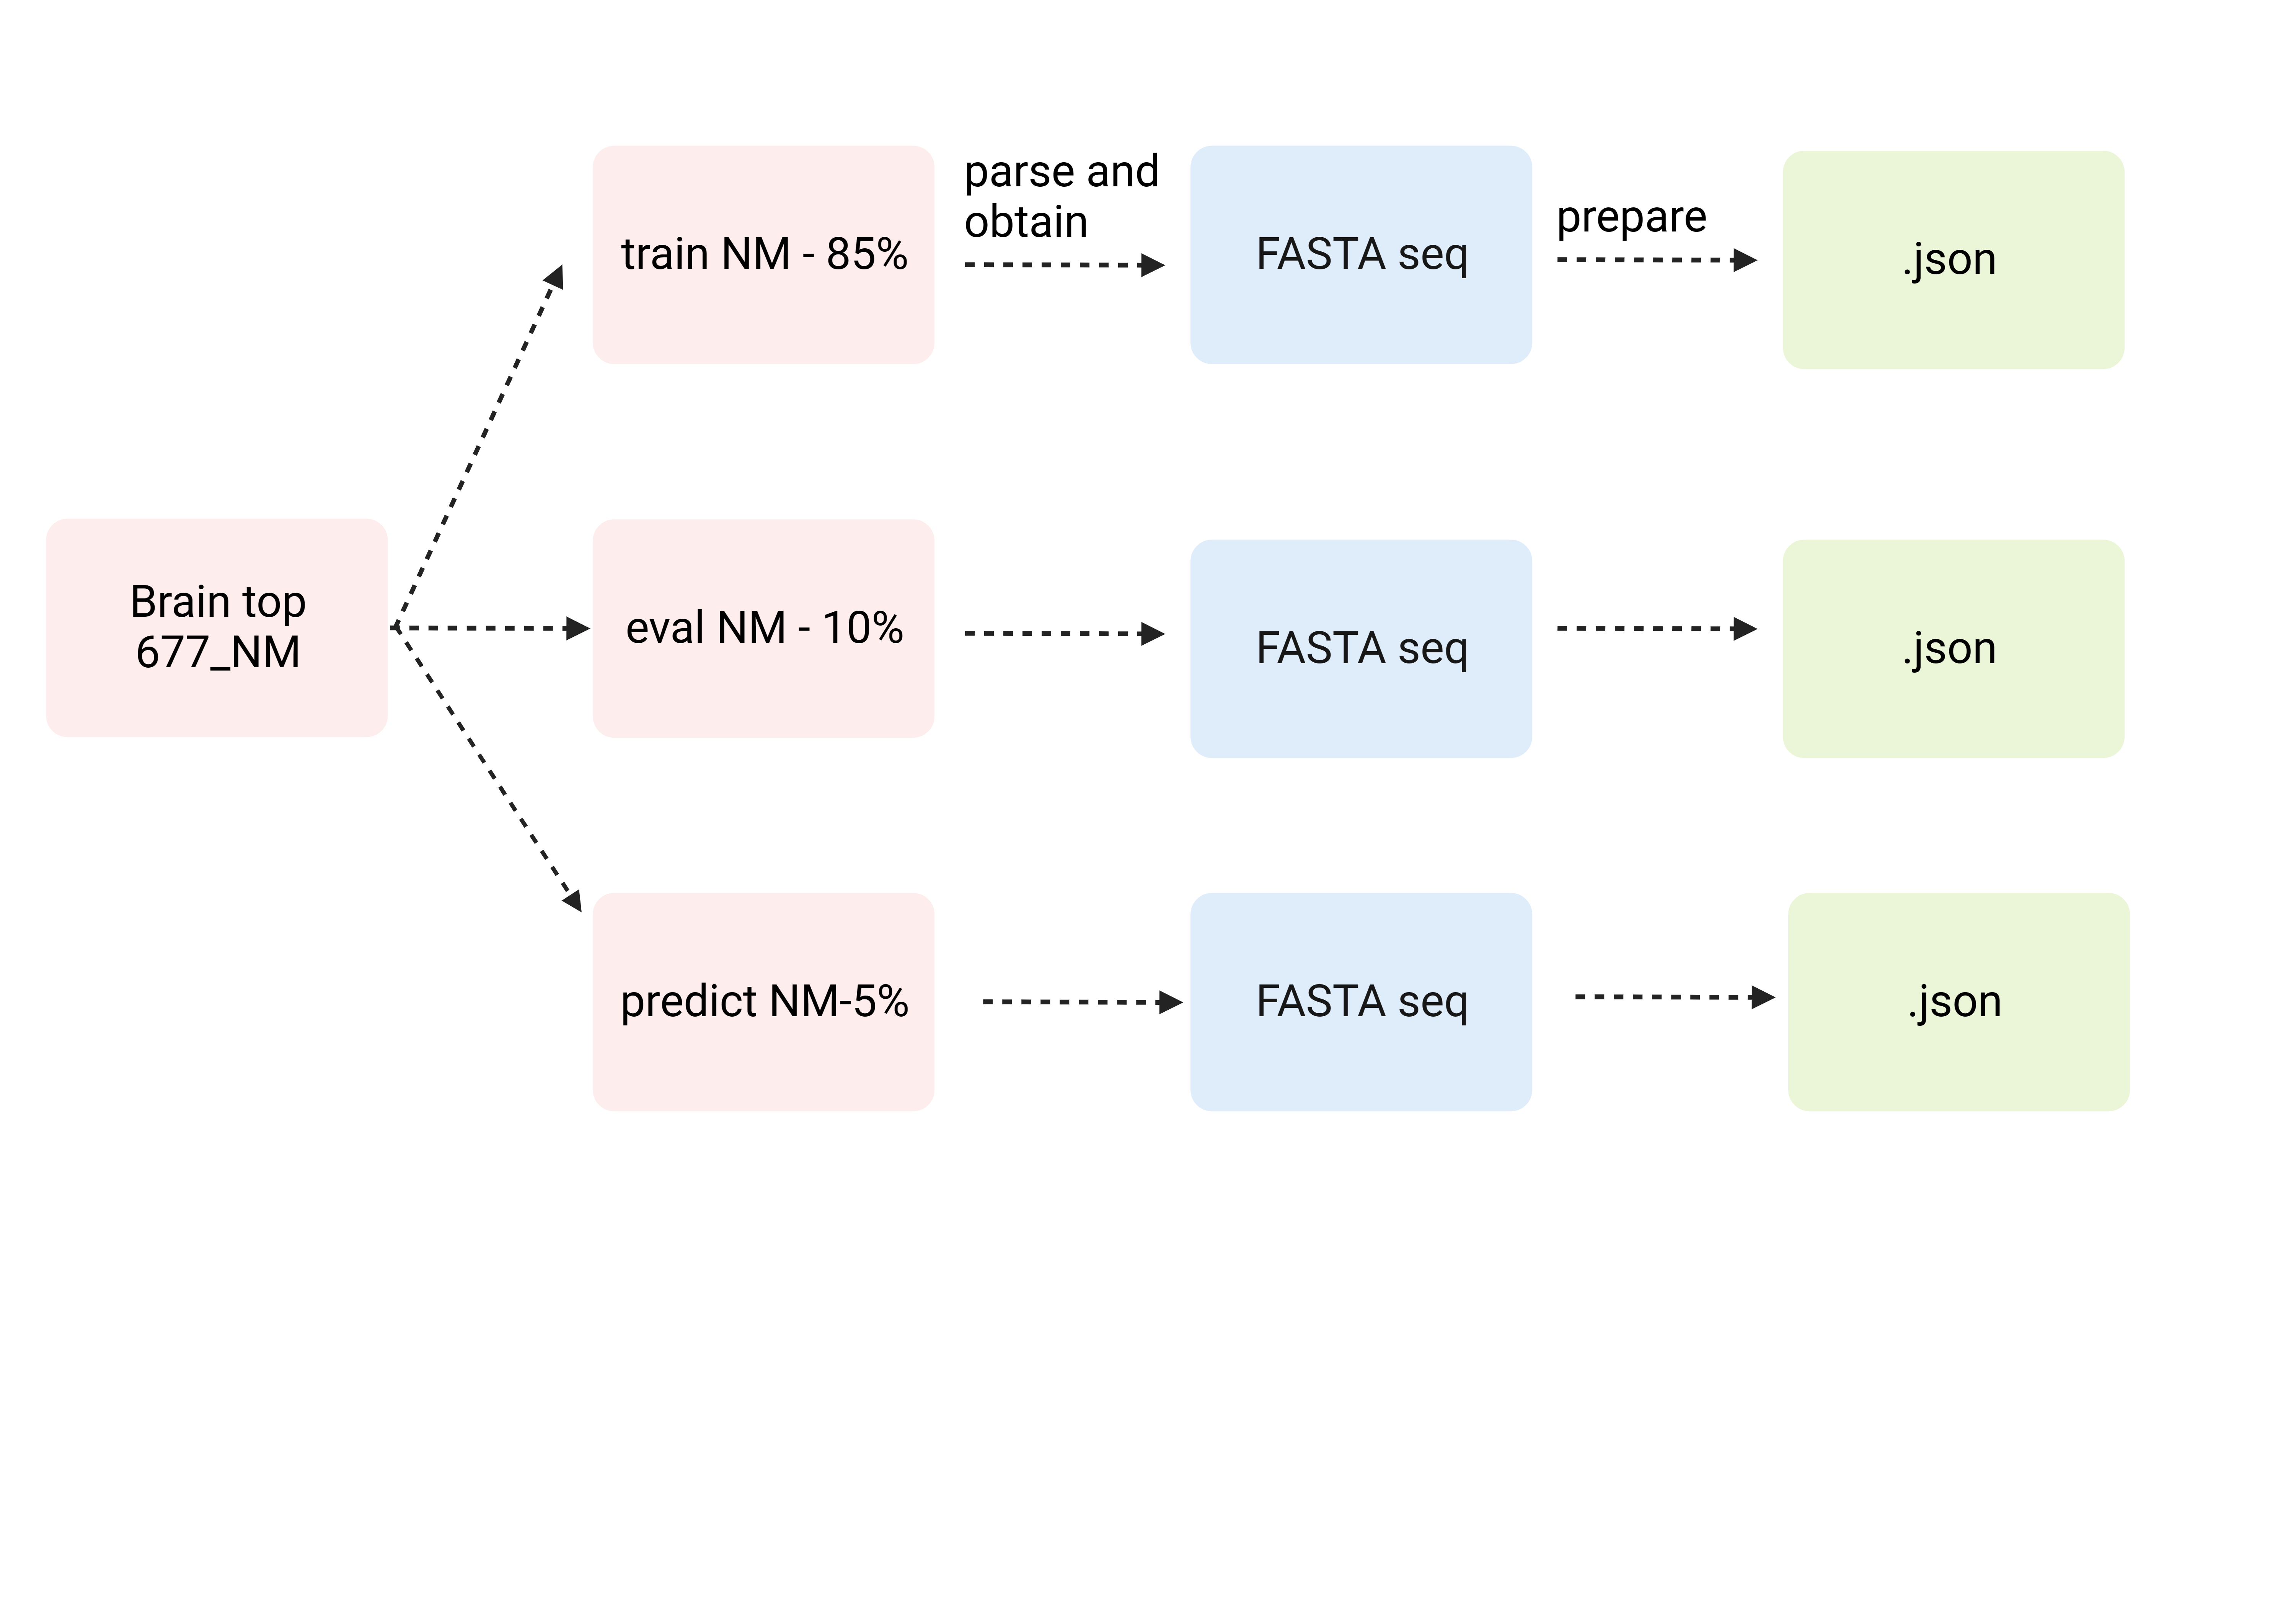

## Split the overall data randomly into three separate datasets 
    - this is the first step where we split the dataset into training, evaluation and prediction data
    - although internally when json files are created we do split the data into randomly 
    - still this step is done to ensure that we take away the prediction genes in the initial step itself

In [3]:

#Script to split the data randomly
import random
import os

def split_file_for_notebook(input_file_path):
    # Read the contents of the file
    with open(input_file_path, "r") as file:
        nm_ids = file.readlines()

    # Shuffle the list to ensure randomness
    random.shuffle(nm_ids)

    # Calculate the sizes for each split
    train_size = int(0.85 * len(nm_ids))
    eval_size = int(0.10 * len(nm_ids))

    # Split the list
    train_nm = nm_ids[:train_size]
    eval_nm = nm_ids[train_size:train_size + eval_size]
    pred_nm = nm_ids[train_size + eval_size:]

    # Determine the directory for saving the output files
    output_dir = os.path.dirname(input_file_path)

    # Write to respective files
    for file_name, data in zip(["training_NM.txt", "evaluation_NM.txt", "Prediction_NM.txt"], 
                               [train_nm, eval_nm, pred_nm]):
        file_path = os.path.join(output_dir, file_name)
        with open(file_path, "w") as file:
            file.writelines(data)



In [ ]:
# Example usage (you can replace with your own file path when using in your notebook):
#for Brain list
input_path = "C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/Brain_top677_NM_List.txt"
split_file_for_notebook(input_path)


In [4]:
#for liver list
input_path = "C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Liver_tissue/asdata/new_strategy/Liver_top868_NM_List.txt"
split_file_for_notebook(input_path)


In [5]:
#for muscle list 
input_path = "C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Muscle_tissue/asdata/Muscle_top904_NM_List.txt"
split_file_for_notebook(input_path)


In [ ]:
pip install Biopython

## Download the sequences in fasta file
    - for the NM ids we need to get the corresponding sequences in fasta format

In [6]:
from Bio import Entrez, SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from collections import defaultdict

def download_transcripts(list_file, email_address="", outfile="brain.fasta"): 
    """Download transcripts from a file of list identifiers"""

    Entrez.email = email_address 
    with open(list_file, "r") as fp: 
        ids = [i.strip() for i in fp.readlines()]

    handle = Entrez.efetch(db="nucleotide", 
                           id=ids,
                           retmode="xml", 
                           strand=1)

    output = Entrez.parse(handle)
    seqs = []
    for entry in output:
        organism = entry.get("GBSeq_organism", "Unknown organism")
        print(f"Organism for {entry['GBSeq_locus']}: {organism}")
        
        feat_tbl = entry["GBSeq_feature-table"]
        num_cds = 0 
        for j in feat_tbl: 
            if j['GBFeature_key'] == "CDS": 
                num_cds += 1
                cds = j["GBFeature_location"]

                cds_loc = j['GBFeature_intervals']
                start = int(cds_loc[0]['GBInterval_from'])
                end = int(cds_loc[0]['GBInterval_to'])
                seq = entry["GBSeq_sequence"][start - 1 : end]
        if num_cds != 1: 
            print("Error: Too many CDS found", num_cds)
        seqs.append(SeqRecord(Seq(seq), 
                              id=entry['GBSeq_locus'],
                              description=entry["GBSeq_definition"]
                              )
                    )
    handle.close()
    with open(outfile, "w") as output_handle:
        SeqIO.write(seqs, output_handle, "fasta")



In [7]:

#for training genes - get the FASTA sequences
# You can replace these values with the desired input and output paths.
list_file_path = "C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/training_NM.txt"  # Replace with your input file path
output_file_path = "C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/training_brainlist.fasta"  # Replace with your desired output file path
email_address = "sandhiya.ravi1@umassmed.edu"  # Replace with your email address

download_transcripts(list_file_path, email_address=email_address, outfile=output_file_path)

Organism for NM_029688: Mus musculus
Organism for NM_001362068: Mus musculus
Organism for NM_025987: Mus musculus
Organism for NM_008707: Mus musculus
Organism for NM_001365070: Mus musculus
Organism for NM_007750: Mus musculus
Organism for NM_172609: Mus musculus
Organism for NM_011971: Mus musculus
Organism for NM_008410: Mus musculus
Organism for NM_024166: Mus musculus
Organism for NM_008139: Mus musculus
Organism for NM_008538: Mus musculus
Organism for NM_025975: Mus musculus
Organism for NM_025610: Mus musculus
Organism for NM_001357212: Mus musculus
Organism for NM_033581: Mus musculus
Organism for NM_009226: Mus musculus
Organism for NM_026611: Mus musculus
Organism for NM_028792: Mus musculus
Organism for NM_001364016: Mus musculus
Organism for NM_010423: Mus musculus
Organism for NM_175103: Mus musculus
Organism for NM_013880: Mus musculus
Organism for NM_019806: Mus musculus
Organism for NM_010726: Mus musculus
Organism for NM_001357278: Mus musculus
Organism for NM_0010332

Organism for NM_001359059: Mus musculus
Organism for NM_153514: Mus musculus
Organism for NM_001327998: Mus musculus
Organism for NM_019785: Mus musculus
Organism for NM_011814: Mus musculus
Organism for NM_001309808: Mus musculus
Organism for NM_145422: Mus musculus
Organism for NM_001039214: Mus musculus
Organism for NM_026242: Mus musculus
Organism for NM_022992: Mus musculus
Organism for NM_026503: Mus musculus
Organism for NM_027439: Mus musculus
Organism for NM_001033213: Mus musculus
Organism for NM_026879: Mus musculus
Organism for NM_007693: Mus musculus
Organism for NM_001356491: Mus musculus
Organism for NM_001359996: Mus musculus
Organism for NM_183016: Mus musculus
Organism for NM_009945: Mus musculus
Organism for NM_172871: Mus musculus
Organism for NM_001346718: Mus musculus
Organism for NM_001195338: Mus musculus
Organism for NM_001368335: Mus musculus
Organism for NM_010948: Mus musculus
Organism for NM_016959: Mus musculus
Organism for NM_001013749: Mus musculus
Organ

Organism for NM_008072: Mus musculus
Organism for NM_010500: Mus musculus
Organism for NM_001360770: Mus musculus
Organism for NM_009297: Mus musculus
Organism for NM_146036: Mus musculus
Organism for NM_026432: Mus musculus
Organism for NM_028007: Mus musculus
Organism for NM_027106: Mus musculus
Organism for NM_001081056: Mus musculus
Organism for NM_009162: Mus musculus
Organism for NM_001357416: Mus musculus
Organism for NM_026236: Mus musculus
Organism for NM_173016: Mus musculus
Organism for NM_001329527: Mus musculus
Organism for NM_133777: Mus musculus
Organism for NM_001040187: Mus musculus
Organism for NM_001271708: Mus musculus
Organism for NM_001360730: Mus musculus
Organism for NM_023824: Mus musculus
Organism for NM_026055: Mus musculus
Organism for NM_019681: Mus musculus
Organism for NM_007808: Mus musculus
Organism for NM_010325: Mus musculus
Organism for NM_015751: Mus musculus
Organism for NM_011221: Mus musculus
Organism for NM_008872: Mus musculus
Organism for NM_0

In [8]:
#for evaluation genes - get the FASTA sequences
# You can replace these values with the desired input and output paths.
list_file_path = "C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/evaluation_NM.txt"  # Replace with your input file path
output_file_path = "C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/evaluation_brainlist.fasta"  # Replace with your desired output file path
email_address = "sandhiya.ravi1@umassmed.edu"  # Replace with your email address

download_transcripts(list_file_path, email_address=email_address, outfile=output_file_path)

Organism for NM_001013755: Mus musculus
Organism for NM_011568: Mus musculus
Organism for NM_011399: Mus musculus
Organism for NM_033618: Mus musculus
Organism for NM_001360151: Mus musculus
Organism for NM_011200: Mus musculus
Organism for NM_001358767: Mus musculus
Organism for NM_001308039: Mus musculus
Organism for NM_001361645: Mus musculus
Organism for NM_001302333: Mus musculus
Organism for NM_009433: Mus musculus
Organism for NM_001033474: Mus musculus
Organism for NM_148934: Mus musculus
Organism for NM_009093: Mus musculus
Organism for NM_025647: Mus musculus
Organism for NM_001271443: Mus musculus
Organism for NM_001372468: Mus musculus
Organism for NM_025887: Mus musculus
Organism for NM_001347656: Mus musculus
Organism for NM_025334: Mus musculus
Organism for NM_008197: Mus musculus
Organism for BC029722: Mus musculus
Error: Too many CDS found 0
Organism for NM_001384169: Mus musculus
Organism for NM_178915: Mus musculus
Organism for NM_023716: Mus musculus
Organism for NM

In [9]:
#for prediction genes - get the FASTA sequences
# You can replace these values with the desired input and output paths.
list_file_path = "C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/Prediction_NM.txt"  # Replace with your input file path
output_file_path = "C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/prediction_brainlist.fasta"  # Replace with your desired output file path
email_address = "sandhiya.ravi1@umassmed.edu"  # Replace with your email address

download_transcripts(list_file_path, email_address=email_address, outfile=output_file_path)

Organism for NM_029250: Mus musculus
Organism for NM_001347561: Mus musculus
Organism for NM_172894: Mus musculus
Organism for NM_011522: Mus musculus
Organism for NM_001079686: Mus musculus
Organism for NM_001277309: Mus musculus
Organism for NM_144784: Mus musculus
Organism for NM_008730: Mus musculus
Organism for NM_030210: Mus musculus
Organism for NM_001357528: Mus musculus
Organism for NM_175383: Mus musculus
Organism for NM_001081975: Mus musculus
Organism for NM_013556: Mus musculus
Organism for NM_011029: Mus musculus
Organism for NM_018860: Mus musculus
Organism for NM_026329: Mus musculus
Organism for NM_025317: Mus musculus
Organism for NM_001411253: Mus musculus
Organism for NM_025550: Mus musculus
Organism for NM_001031808: Mus musculus
Organism for NM_001317353: Mus musculus
Organism for NM_023671: Mus musculus
Organism for NM_001416207: Mus musculus
Organism for NM_011072: Mus musculus
Organism for NM_025736: Mus musculus
Organism for NM_026892: Mus musculus
Organism fo

## pre-processing data 
- to get the .json files 
- this has to be done only for training and evaluation genes 

In [11]:
#for training genes - pre-process and get the json file

import json
import numpy as np
import pandas as pd
from Bio import SeqIO 
import random
from collections import OrderedDict

# Initialize lists and define acceptable DNA bases and amino acids.
dna_seq = []
dna_seq_new = []
aa_seq_new = []
bases = ['A','C','G','T']
residues = ['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V','B','Z','X']

   
# Initialize list of tests to verify properties of the DNA and AA sequences.
test_total = [0,0,0,0,0,0,0]

# Import starting list of DNA sequences from fasta file containing  CDS sequences.
for sequence in SeqIO.parse('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/training_brainlist.fasta','fasta'):
    dna_seq.append(sequence.seq.upper())

# Verify properties of DNA sequences and their resulting AA sequences. 
# If all tests pass (0), DNA and AA sequences are inserted into matching indices of two new lists. 
for sequence in dna_seq:

    # Re-initialize test scores. 
    test = [1,0,1,1,1,0,1]

    # The first test verifies that the length of the DNA sequence is divisible by 3, indicating it can be translated. 
    if len(sequence) % 3 == 0:
        test[0] = 0

        # The second test verifies that the DNA sequence only contains the 4 standard DNA bases.
        for base in sequence:
            if base not in bases:
                test[1] = 1

        # If both of the DNA sequence tests pass, the DNA sequence is translated to AA sequence.
        single_aa_seq_pre = str(sequence.translate())
        single_aa_seq = single_aa_seq_pre.replace('*','Z')

        # The third test verifies that the AA sequence begins with Met. 
        if single_aa_seq[0] == 'M':
                test[2] = 0

        # The fourth test verifies that the AA sequence ends with a stop codon (*).
        if single_aa_seq[-1] == 'Z':
                test[3] = 0

        # The fifth test verifies that the AA sequence only contains a single stop codon.
        if single_aa_seq.count('Z') == 1:
                test[4] = 0

        # The sixth test verifies that the AA sequence contains only the standard 20 AAs, plus stop (*).
        for aa in single_aa_seq:
                if aa not in residues:
                    test[5] = 1

        # The seventh test verifies that dna_len = 3*aa_len
        if len(sequence) == 3*len(single_aa_seq):
                test[6] = 0

    # The cumulative number of times each test failed is recorded and output during each iteration. 
    test_total = [test_total[i] + test[i] for i in range(len(test_total))]
    print(test_total)

    # If all 7 tests succeed, the DNA sequence and corresponding AA sequence are added to new lists. 
    if test == [0,0,0,0,0,0,0]:
        dna_seq_new.append(str(sequence))
        aa_seq_new.append(str(single_aa_seq))

# Shuffle items in the dictionary
seq_dict = {dna_seq_new[i]: aa_seq_new[i] for i in range (len(dna_seq_new))}
items = list(seq_dict.items())
random.shuffle(items)
dict_shuff = OrderedDict(items)

# Write to file
with open('trainingbrain_mus_dict.json','w') as f:
        json.dump(dict_shuff, f)

[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 

[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 

In [12]:
#for evaluation genes - pre-process and get the json file

import json
import numpy as np
import pandas as pd
from Bio import SeqIO 
import random
from collections import OrderedDict

# Initialize lists and define acceptable DNA bases and amino acids.
dna_seq = []
dna_seq_new = []
aa_seq_new = []
bases = ['A','C','G','T']
residues = ['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V','B','Z','X']

   
# Initialize list of tests to verify properties of the DNA and AA sequences.
test_total = [0,0,0,0,0,0,0]

# Import starting list of DNA sequences from fasta file containing CDS sequences.
for sequence in SeqIO.parse('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/evaluation_brainlist.fasta','fasta'):
    dna_seq.append(sequence.seq.upper())

# Verify properties of DNA sequences and their resulting AA sequences. 
# If all tests pass (0), DNA and AA sequences are inserted into matching indices of two new lists. 
for sequence in dna_seq:

    # Re-initialize test scores. 
    test = [1,0,1,1,1,0,1]

    # The first test verifies that the length of the DNA sequence is divisible by 3, indicating it can be translated. 
    if len(sequence) % 3 == 0:
        test[0] = 0

        # The second test verifies that the DNA sequence only contains the 4 standard DNA bases.
        for base in sequence:
            if base not in bases:
                test[1] = 1

        # If both of the DNA sequence tests pass, the DNA sequence is translated to AA sequence.
        single_aa_seq_pre = str(sequence.translate())
        single_aa_seq = single_aa_seq_pre.replace('*','Z')

        # The third test verifies that the AA sequence begins with Met. 
        if single_aa_seq[0] == 'M':
                test[2] = 0

        # The fourth test verifies that the AA sequence ends with a stop codon (*).
        if single_aa_seq[-1] == 'Z':
                test[3] = 0

        # The fifth test verifies that the AA sequence only contains a single stop codon.
        if single_aa_seq.count('Z') == 1:
                test[4] = 0

        # The sixth test verifies that the AA sequence contains only the standard 20 AAs, plus stop (*).
        for aa in single_aa_seq:
                if aa not in residues:
                    test[5] = 1

        # The seventh test verifies that dna_len = 3*aa_len
        if len(sequence) == 3*len(single_aa_seq):
                test[6] = 0

    # The cumulative number of times each test failed is recorded and output during each iteration. 
    test_total = [test_total[i] + test[i] for i in range(len(test_total))]
    print(test_total)

    # If all 7 tests succeed, the DNA sequence and corresponding AA sequence are added to new lists. 
    if test == [0,0,0,0,0,0,0]:
        dna_seq_new.append(str(sequence))
        aa_seq_new.append(str(single_aa_seq))

# Shuffle items in the dictionary
seq_dict = {dna_seq_new[i]: aa_seq_new[i] for i in range (len(dna_seq_new))}
items = list(seq_dict.items())
random.shuffle(items)
dict_shuff = OrderedDict(items)

# Write to file
with open('evaluationbrain_mus_dict.json','w') as f:
        json.dump(dict_shuff, f)

[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 

## Training the model

In [ ]:
import os
import json
import io
import pickle

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import GRU, Dense, TimeDistributed, Bidirectional, Dropout
from keras.layers.embeddings import Embedding
from tensorflow.keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# Encrypt DNA and AA sequences into individuals words (codons and residues) by adding spaces
def encrypt(string,length):
    return ' '.join(string[i:i+length] for i in range(0,len(string),length))

# Tokenize DNA and AA sequences
def tokenize(x):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(x)
    return tokenizer.texts_to_sequences(x), tokenizer

# Pad sequences if they are shorter than the max sequence length
def pad(x, length=None):
    return pad_sequences(x, maxlen=length, padding='post')

# Combine tokenization and padding into one preprocessing function
def preprocess(x, y):
    preprocess_x, x_tk = tokenize(x)
    preprocess_y, y_tk = tokenize(y)
    preprocess_x = pad(preprocess_x)
    preprocess_y = pad(preprocess_y)
    preprocess_y = preprocess_y.reshape(*preprocess_y.shape, 1)

    return preprocess_x, preprocess_y, x_tk, y_tk

# Add desired layers to RNN model
def model_embed(input_shape, output_sequence_length, aa_vocab_size, dna_vocab_size):
    learning_rate = 0.006
    model = Sequential()
    model.add(Embedding(aa_vocab_size, 128, input_length=input_shape[1], input_shape=input_shape[1:],mask_zero=True))
    model.add(Bidirectional(GRU(16, return_sequences=True)))
    model.add(TimeDistributed(Dense(128, activation='relu')))
    model.add(Dropout(0.3))
    
    model.add(TimeDistributed(Dense(dna_vocab_size, activation='softmax')))
    model.compile(loss=sparse_categorical_crossentropy, optimizer=Adam(learning_rate), metrics=['accuracy'])

    return model

# cd to appropriate directory
os.chdir('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/')


# Read in dictionary of matched DNA, AA sequences
with open('trainingbrain_mus_dict.json') as f:
    dna_aa_dict = json.load(f)

# Make separate lists for the DNA, AA training sequences (previously randomized)
dna_list_pre = list(dna_aa_dict.keys())
aa_list_pre = list(dna_aa_dict.values())
dna_list = dna_list_pre[:]
aa_list = aa_list_pre[:]

# Encrypt DNA, AA sequences into separate 'words' by adding spaces every 3 or 1 characters
aa_spaces = []
for aa_seq in aa_list:
    aa_current = encrypt(aa_seq,1)
    aa_spaces.append(aa_current)
dna_spaces = []
for dna_seq in dna_list:
    dna_current = encrypt(dna_seq,3)
    dna_spaces.append(dna_current)

# Preprocess DNA and AA sequences (tokenize and pad)
preproc_aa, preproc_dna, aa_tokenizer, dna_tokenizer = preprocess(aa_spaces, dna_spaces)

# Export DNA and AA tokenizers, which will be used when predicting codon optimized sequence
aa_tokenizer_json = aa_tokenizer.to_json()
with io.open('aa_tokenizer.json','w', encoding='utf-8') as f:
    f.write(json.dumps(aa_tokenizer_json, ensure_ascii=False))

dna_tokenizer_json = dna_tokenizer.to_json()
with io.open('dna_tokenizer.json','w', encoding='utf-8') as f:
    f.write(json.dumps(dna_tokenizer_json, ensure_ascii=False))

# Ensure correct dimensionality
tmp_x = pad(preproc_aa, preproc_dna.shape[1])
tmp_x = tmp_x.reshape((-1, preproc_dna.shape[-2]))

# Make RNN model as defined previously, and using dimensions of AA, DNA vectors
my_model = model_embed(tmp_x.shape, preproc_dna.shape[1], len(aa_tokenizer.word_index)+1, len(dna_tokenizer.word_index)+1)

# Show the model parameters
my_model.summary()

# Allow for early stopping if the loss plateus, and export the newest model each epoch
callbacks = [EarlyStopping(monitor='val_loss', patience=5), ModelCheckpoint('rnn_model_newest.h5')]

# Fit the RNN model to DNA, AA sequences, and store the history of loss/accuracy
hist = my_model.fit(tmp_x, preproc_dna, batch_size=16, epochs=10, validation_split=0.2, callbacks=callbacks)

# Save the model for use in prediction, evaluation
my_model.save('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/rnn_model.h5')

# Also export the history of loss/accuracy
with open('rnn_history','wb') as f:
    
    pickle.dump(hist.history, f)
    
    



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3054, 128)         2816      
                                                                 
 bidirectional (Bidirectiona  (None, 3054, 32)         14016     
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 3054, 128)        4224      
 ibuted)                                                         
                                                                 
 dropout (Dropout)           (None, 3054, 128)         0         
                                                                 
 time_distributed_1 (TimeDis  (None, 3054, 65)         8385      
 tributed)                                                       
                                                        

'\nWhile saving model if you find error uninstall and re-install the latest version of h5py\n\nhttps://i.stack.imgur.com/zsfuB.png\n\n'

## Model Evaluation

In [3]:
#Model Evaluation:

import os
import json
import pickle

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import tokenizer_from_json
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model

# Encrypt DNA and AA sequences into individuals words (codons and residues) by adding spaces
def encrypt(string,length):
    return ' '.join(string[i:i+length] for i in range(0,len(string),length))

# Pad sequences if they are shorter than the max sequence length
def pad(x, length=None):
    return pad_sequences(x, maxlen=length, padding='post')

# Combine tokenization and padding
# Used 8801 based on dimensions of model
def preprocess(x,y):
    preprocess_x = aa_tokenizer.texts_to_sequences(x)
    preprocess_x = pad(preprocess_x, 3054)
    preprocess_y = dna_tokenizer.texts_to_sequences(y)
    preprocess_y = pad(preprocess_y, 3054)
    preprocess_y = preprocess_y.reshape(*preprocess_y.shape, 1)
    return preprocess_x, preprocess_y

# Set the working directory
os.chdir('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/')

# Import trained model as .h5    
model = load_model('rnn_model.h5')

# Read in dictionary of matched DNA, AA sequences (contains test set)
with open('evaluationbrain_mus_dict.json') as f:
    dna_aa_dict = json.load(f)

# Make separate lists for the DNA, AA test sequences
dna_list_pre = list(dna_aa_dict.keys())
aa_list_pre = list(dna_aa_dict.values())
dna_list = dna_list_pre[ : ]
aa_list = aa_list_pre[ : ]

# Encrypt DNA, AA sequences into separate 'words' by adding spaces every 3 or 1 characters
aa_spaces = []
for aa_seq in aa_list:
    aa_current = encrypt(aa_seq,1)
    aa_spaces.append(aa_current)
dna_spaces = []
for dna_seq in dna_list:
    dna_current = encrypt(dna_seq,3)
    dna_spaces.append(dna_current)

# Import tokenizers as json (must be same tokenizers from training)
with open('aa_tokenizer.json') as f:
    aa_json = json.load(f)
aa_tokenizer = tokenizer_from_json(aa_json)

with open('dna_tokenizer.json') as f:
    dna_json = json.load(f)
dna_tokenizer = tokenizer_from_json(dna_json)

# Preprocess DNA and AA sequences (tokenize and pad)
preproc_aa, preproc_dna = preprocess(aa_spaces, dna_spaces)

# Ensure correct dimensionality
tmp_x = pad(preproc_aa, preproc_dna.shape[1])
tmp_x = tmp_x.reshape((-1, preproc_dna.shape[-2]))

# Evaluate the test sequences on the trained model
results = model.evaluate(preproc_aa,preproc_dna, batch_size=10)

# Export the evaluation loss and accuracy
with open('rnn_evaluation','wb') as f:
    pickle.dump(results, f)

7/7 [==============================] - 3s 175ms/step - loss: 0.1301 - accuracy: 0.5177


## Forming individual FASTA files for the prediction of benchmark genes
- For the prediction genes, from the prediction.fasta file, extract the sequences and create individual fasta files with the _dna suffix 

- DNAseqfasta_pred - This folder contains the wildtype sequences that are the prediction genes 

Read Sequences from the NCBI directly and save it in a single local file and then extract the individual sequences for each NM id and write it into separate fasta files - the naming convention of each of the file is genename_dna

In [5]:
import os

def sanitize_filename(filename):
    """Remove or replace characters that are invalid for filenames."""
    invalid_chars = ['<', '>', ':', '"', '/', '\\', '|', '?', '*']
    for char in invalid_chars:
        filename = filename.replace(char, '_')  # replace invalid char with underscore
    return filename

def extract_gene_name_from_header(header):
    """Extract and sanitize gene name from the header of a FASTA sequence."""
    gene_name = header.split("(")[-1].split(")")[0]
    return sanitize_filename(gene_name)

def create_individual_fasta_files(input_file_path, output_dir_path):
    """Read a FASTA file and create individual files for each sequence."""
    
    # Read the provided FASTA file and split it into individual sequences
    with open(input_file_path, "r") as f:
        content = f.read().strip()
        sequences = content.split(">")[1:]  # Skip the first empty item
    
    # Extract gene names and create individual FASTA files
    for sequence in sequences:
        header, seq_data = sequence.split("\n", 1)
        gene_name = extract_gene_name_from_header(header)
        output_filename = os.path.join(output_dir_path, f"{gene_name}_dna.fasta")
        
        with open(output_filename, "w") as output_file:
            output_file.write(f">{header}\n{seq_data}")

    print("FASTA files created successfully.")

# Define paths
input_file_path = "C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/prediction_brainlist.fasta"
output_dir_path = "C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/DNAseqfasta_pred"

# Run the function
create_individual_fasta_files(input_file_path, output_dir_path)


FASTA files created successfully.


## For the Benchmark sequences convert the dna seq to amino acid sequences;
 

In [10]:
'''
Convert DNA seqs to AA, given newly CDS-only seqs.
Write these AA seqs into record files.
'''

from Bio.Seq import Seq
import os
from Bio import SeqIO
#DNAseqfasta_pred - is a folder that contains the wildtype sequences
dna_dir = r"C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/DNAseqfasta_pred"

aa_dir = r"C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/Aminoacidsequences"

for entry in os.scandir(dna_dir):
    record = SeqIO.read(entry,'fasta')
    record.seq = record.translate().seq

    SeqIO.write(record,os.path.join(aa_dir, entry.name[0:-9] + "_aa.fasta"),"fasta")

## Predictions from the designed model to the benchmark genes:

- convert the amino acid benchmark sequence files in fasta format into the text format with only the amino acid sequence without the > NM identifiers

- then use this folder which has the amino acid sequences in text format to get the predictions


In [11]:
import os

def extract_amino_acid_sequence_from_fasta(fasta_file):
    with open(fasta_file, "r") as file:
        content = file.readlines()
    return "".join(content[1:]).replace("\n", "")

def process_files_in_input_output_directory(input_directory, output_directory):
    for filename in os.listdir(input_directory):
        if filename.endswith(".fasta"):
            # Extracting the amino acid sequence
            sequence = extract_amino_acid_sequence_from_fasta(os.path.join(input_directory, filename))
            
            # Creating the output filename
            output_filename = filename.split("__")[0] + ".txt"
            with open(os.path.join(output_directory, output_filename), "w") as file:
                file.write(sequence)
            print(f"Processed {filename} -> {output_filename}")

# Example usage (you can modify the paths accordingly)
# process_files_in_input_output_directory("/path/to/input/directory", "/path/to/output/directory")



In [13]:
process_files_in_input_output_directory("C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/Aminoacidsequences","C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/Aminoacidsequences_txtfiles")

Processed Aacs__aa.fasta -> Aacs.txt
Processed Acat1__aa.fasta -> Acat1.txt
Processed Atp6v0d1__aa.fasta -> Atp6v0d1.txt
Processed B4gat1__aa.fasta -> B4gat1.txt
Processed Cacng7__aa.fasta -> Cacng7.txt
Processed Clns1a__aa.fasta -> Clns1a.txt
Processed Eif1b__aa.fasta -> Eif1b.txt
Processed Emc2__aa.fasta -> Emc2.txt
Processed Etnk1__aa.fasta -> Etnk1.txt
Processed Fam91a1__aa.fasta -> Fam91a1.txt
Processed Hprt1__aa.fasta -> Hprt1.txt
Processed Lamp1__aa.fasta -> Lamp1.txt
Processed Mea1__aa.fasta -> Mea1.txt
Processed Mfap1b__aa.fasta -> Mfap1b.txt
Processed Mrpl41__aa.fasta -> Mrpl41.txt
Processed Mrpl54__aa.fasta -> Mrpl54.txt
Processed Mtcl3__aa.fasta -> Mtcl3.txt
Processed Nptx1__aa.fasta -> Nptx1.txt
Processed Nr4a1__aa.fasta -> Nr4a1.txt
Processed Pfn1__aa.fasta -> Pfn1.txt
Processed Pgam1__aa.fasta -> Pgam1.txt
Processed Pip4k2b__aa.fasta -> Pip4k2b.txt
Processed Polr2g__aa.fasta -> Polr2g.txt
Processed Ppp6r1__aa.fasta -> Ppp6r1.txt
Processed Psmd6__aa.fasta -> Psmd6.txt
Pro

In [2]:
#model predictions
import os
import numpy as np
import json

from keras.preprocessing.text import tokenizer_from_json
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model

# Encrypt the amino acid sequence
def encrypt(string, length):
    return ' '.join(string[i:i+length] for i in range(0, len(string), length))

# Pad the amino acid sequence to the correct length (matching model)
def pad(x, length=None):
    return pad_sequences(x, maxlen=length, padding='post')

# Combine tokenization and padding
def preprocess(x):
    preprocess_x = aa_tokenizer.texts_to_sequences(x)
    preprocess_x = pad(preprocess_x)
    return preprocess_x

# Transform tokens back to DNA sequence
def logits_to_text(logits, tokenizer):
    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

# Import trained model as .h5
model = load_model(r'C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/rnn_model.h5')

# Import tokenizers as json
with open('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/aa_tokenizer.json') as f:
    aa_json = json.load(f)
aa_tokenizer = tokenizer_from_json(aa_json)

with open('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/dna_tokenizer.json') as f:
    dna_json = json.load(f)
dna_tokenizer = tokenizer_from_json(dna_json)

# Directory paths
#input_dir = 'C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/Aminoacidsequences_txtfiles'
#output_dir = 'C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/predictionsoutput'


input_dir = 'C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/Aminoacidsequences_txtfiles/GTgenes/Gluc_cas9'
output_dir = 'C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/GTgenes/Gluc_cas9'


# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Process each file in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".txt"):
        # Construct full path
        filepath = os.path.join(input_dir, filename)

        # Import sequence from file
        with open(filepath) as f:
            aa_item = f.read()

        # Process sequence
        aa_item_with_stop = aa_item + 'Z'
        aa_item_with_stop = aa_item_with_stop.replace(" ", "").replace("\n", "").replace("\r", "").replace("\t", "")
        aa_list = [aa_item_with_stop]
        seq_len = len(aa_item_with_stop)

        aa_spaces = [encrypt(aa_seq, 1) for aa_seq in aa_list]

        preproc_aa = preprocess(aa_spaces)
        tmp_x = pad(preproc_aa, 3054)
        tmp_x = tmp_x.reshape((-1, 3054))

        seq_opt = logits_to_text(model.predict(tmp_x[:1])[0], dna_tokenizer)
        seq_opt_final = seq_opt[:(seq_len*4)].replace(" ", "").upper()

        # Export predictions
        output_filename = os.path.splitext(filename)[0] + "_opt.txt"
        output_filepath = os.path.join(output_dir, output_filename)
        
        with open(output_filepath, "w") as f_out:
            print("This sequences is the optimized sequence of Gene:", filename, seq_opt_final[:-3], file=f_out)

        with open(os.path.join(output_dir, "Optimized_output.txt"), "a+") as ff:
            print("Optimized sequence of Gene:", filename, seq_opt_final[:-3], sep='\n', file=ff)


## Convert the above predictions in text format to fasta format files 

In [3]:
import re

def convert_txt_to_fasta_final(input_directory, output_directory):
    # Ensure the output directory exists
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    
    # Get all the files in the input directory
    files = [f for f in os.listdir(input_directory) if f.endswith('_opt.txt')]
    
    fasta_files = []  # List to store the names of the generated FASTA files
    
    for filename in files:
        input_filepath = os.path.join(input_directory, filename)
        
        # Read the content of the file
        with open(input_filepath, 'r') as file:
            content = file.read()
        
        # Use regex to remove the sentence that starts with "This" and ends with ".txt"
        content = re.sub(r"This sequences is the optimized sequence of Gene:.*\.txt", "", content).strip()
        
        # Extract the identifier from the filename
        identifier = '>nm' + filename.replace('_opt.txt', '')
        
        # Prepare the FASTA content
        fasta_content = identifier + '\n' + content
        
        # Write to a new FASTA file in the output directory
        fasta_filename = filename.replace('_opt.txt', '.fasta')
        output_filepath = os.path.join(output_directory, fasta_filename)
        with open(output_filepath, 'w') as fasta_file:
            fasta_file.write(fasta_content)
        
        fasta_files.append(output_filepath)
    
    return fasta_files


In [4]:

# Retry the function execution with the final sentence removal
#converted_files_final = convert_txt_to_fasta_final('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/predictionsoutput', 'C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/predictionsoutputfasta')
#converted_files_final

converted_files_final = convert_txt_to_fasta_final('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/GTgenes/Gluc_cas9', 'C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/GTgenes/Gluc_cas9')
converted_files_final

['C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/GTgenes/Gluc_cas9\\G_aa.fasta.fasta',
 'C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/GTgenes/Gluc_cas9\\hNme2C_aa.fasta.fasta']

In [42]:
#sanity check 
s_opttxt = "ATGCAGATGAGCTATGCCATCCGCTGTGCCTTCTACCAGCTGCTGCTGGCTGCCCTGATGCTGGTGGCCATGCTGCAGCTGCTGTACCTGAGCCTGCTGTCTGGCCTGCATGGCCAGGAGGAGCAGGAGCAGTACTTTGAGTTCTTTCCTCCTAGCCCCAGGAGTGTGGACCAGGTGAAGAGCCAGCTGAGGACAGCCCTGGCCTCTGGAGGAGTGCTGGATGCCTCTGGAGACTACAGAGTGTACAGAGGCCTGCTGAAGACCACCATGGACCCCAATGATGTGATCCTGGCCACCCATGCCTCTGTGGACAACCTGCTGCACCTGTCTGGCCTGCTGGAGAGGTGGGAAGGCCCCCTGTCTGTGTCTGTGTTTGCTGCCACCAAGGAAGAGGCCCAGCTGGCCACAGTGCTGGCCTATGCCCTGAGCAGCCACTGTCCTGAGATGAGAGCCAGAGTGGCCATGCACCTGGTGTGTCCCAGCCGCTATGAGGCTGCTGTGCCTGACCCTAGAGAGCCTGGAGAGTTTGCCCTGCTGCGCAGCTGCCAGGAAGTGTTTGACAAGCTGGCCAGAGTGGCCCAGCCTGGCATCAACTATGCCCTGGGCACCAACACCAGCTACCCCAACAACCTGCTGAGGAACCTGGCCAGAGAGGAGGCCAACTATGCCCTGGTGATTGATGTGGACATGGTGCCCTCAGAGGGCCTGTGGAGAGGCCTGAGAGAGATGCTGGACCAGAGCAACCACTGGGATGGCACAGCCCTGGTGGTGCCTGCCTTTGAGATCAGGAGGAGCAGGAGGATGCCCATGAACAAGAATGAGCTGGTGCAGCTGTACCAGGTGGGAGAGGTGCGGCCCTTCTACTATGGCCTGTGCACACCCTGCCATGCTCCCACCAACTACAGCCGCTGGGTGAACCTGCCTGAGGAGAGCCTGCTGAGGCCTGCCTATGTGGTGCCCTGGAGAGACCCCTGGGAGCCCTTCTATGTGGCTGGAGGCAAAGTGCCCACCTTTGATGAGAGGTTCAGGCAGTATGGCTTCAACAGGATCAGCCAGGCCTGTGAGCTGCATGTGGCTGGCTTCAACTTTGAAGTGCTGAATGAAGGCTTCCTGGTGCACAAAGGCTTCAAGGAAGCCCTGAAGTTCCATCCTCAGAAGGAAGCTGAGAACCAGAGGAACAAGATCCTGTACAGGCAGTTCAAGCAGGAGCTGAAGGCCAGGTACCCCAACAGCCCTCACCGCTGTTGA"
s_fasta = "ATGCAGATGAGCTATGCCATCCGCTGTGCCTTCTACCAGCTGCTGCTGGCTGCCCTGATGCTGGTGGCCATGCTGCAGCTGCTGTACCTGAGCCTGCTGTCTGGCCTGCATGGCCAGGAGGAGCAGGAGCAGTACTTTGAGTTCTTTCCTCCTAGCCCCAGGAGTGTGGACCAGGTGAAGAGCCAGCTGAGGACAGCCCTGGCCTCTGGAGGAGTGCTGGATGCCTCTGGAGACTACAGAGTGTACAGAGGCCTGCTGAAGACCACCATGGACCCCAATGATGTGATCCTGGCCACCCATGCCTCTGTGGACAACCTGCTGCACCTGTCTGGCCTGCTGGAGAGGTGGGAAGGCCCCCTGTCTGTGTCTGTGTTTGCTGCCACCAAGGAAGAGGCCCAGCTGGCCACAGTGCTGGCCTATGCCCTGAGCAGCCACTGTCCTGAGATGAGAGCCAGAGTGGCCATGCACCTGGTGTGTCCCAGCCGCTATGAGGCTGCTGTGCCTGACCCTAGAGAGCCTGGAGAGTTTGCCCTGCTGCGCAGCTGCCAGGAAGTGTTTGACAAGCTGGCCAGAGTGGCCCAGCCTGGCATCAACTATGCCCTGGGCACCAACACCAGCTACCCCAACAACCTGCTGAGGAACCTGGCCAGAGAGGAGGCCAACTATGCCCTGGTGATTGATGTGGACATGGTGCCCTCAGAGGGCCTGTGGAGAGGCCTGAGAGAGATGCTGGACCAGAGCAACCACTGGGATGGCACAGCCCTGGTGGTGCCTGCCTTTGAGATCAGGAGGAGCAGGAGGATGCCCATGAACAAGAATGAGCTGGTGCAGCTGTACCAGGTGGGAGAGGTGCGGCCCTTCTACTATGGCCTGTGCACACCCTGCCATGCTCCCACCAACTACAGCCGCTGGGTGAACCTGCCTGAGGAGAGCCTGCTGAGGCCTGCCTATGTGGTGCCCTGGAGAGACCCCTGGGAGCCCTTCTATGTGGCTGGAGGCAAAGTGCCCACCTTTGATGAGAGGTTCAGGCAGTATGGCTTCAACAGGATCAGCCAGGCCTGTGAGCTGCATGTGGCTGGCTTCAACTTTGAAGTGCTGAATGAAGGCTTCCTGGTGCACAAAGGCTTCAAGGAAGCCCTGAAGTTCCATCCTCAGAAGGAAGCTGAGAACCAGAGGAACAAGATCCTGTACAGGCAGTTCAAGCAGGAGCTGAAGGCCAGGTACCCCAACAGCCCTCACCGCTGTTGA"

if(s_opttxt==s_fasta):
    print("yes")


yes


## URC - Approach
- this is the super naive approach


In [17]:
# Naively optimizes a directory containing amino acid sequences in the FASTA format and saves 
#these "optimized" / "generated" DNA sequences in a directory.

# Import the following modules:
import random
import os
from Bio import SeqIO
import re
from Bio.Seq import Seq

# Amino acid sequence dir to optimize:
aa_dir = r"C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/Aminoacidsequences/"

# Output dir to store optimized seqs:
out_dir = r"C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/URC_Super_Naive"

# Amino acid to codon table, outputs arr of codons:
def aa2codons(seq : str) -> list:
    _aas = {
        "A": ["GCT GCC GCA GCG"],
        "R": ["CGT CGC CGA CGG AGA AGG"],
        "N": ["AAT AAC"],
        "D": ["GAT GAC"],
        "C": ["TGT TGC"],
        "Q": ["CAA CAG"],
        "E": ["GAA GAG"],
        "G": ["GGT GGC GGA GGG"],
        "H": ["CAT CAC"],
        "I": ["ATT ATC ATA"],
        "L": ["TTA TTG CTT CTC CTA CTG"],
        "K": ["AAA AAG"],
        "M": ["ATG ATG"],
        "F": ["TTT TTC"],
        "P": ["CCT CCC CCA CCG"],
        "S": ["TCT TCC TCA TCG AGT AGC"],
        "T": ["ACT ACC ACA ACG"],
        "W": ["TGG TGG"],
        "Y": ["TAT TAC"],
        "V": ["GTT GTC GTA GTG"],
        "B": ["GAT GAC AAT AAC"],
        "Z": ["GAA GAG CAA CAG"],
        "*": ["TAA TAG TGA"],
    }
    return [_aas[i] for i in seq]

# Converts an amino acid to a random corresponding codon:
for entry in os.scandir(aa_dir):
    # Read in the amino acid sequence:
    name = entry.name[0:-7] + "_dna"
    record = SeqIO.read(entry,'fasta')
    arr = []
    # Convert amino acid to codons:
    for i in record.seq:
        #Randomly choose a codon from the list of codons for the amino acid:
        arr.append(random.choice(aa2codons(i)[0][0].split()))

    # Convert the array of codons to a string:
    record.seq = Seq(re.sub('[^GATC]',"",str("".join(arr)).upper()))
    complete_name = os.path.join(out_dir, name)

    # Save the super naively optimized DNA sequence:
    SeqIO.write(record, complete_name + ".fasta", "fasta")


## BFC approach 

- This is the Naive approach 

In [18]:
#import standard modules; re is used for regex on ln 59
# Stuff from standard library
import random
import time
import timeit

# Import Biopython modules
import Bio
import Bio.Seq

import Bio.SeqRecord
import Bio.SeqIO
import Bio.AlignIO
import Bio.Entrez
import os
from Bio import SeqIO
from Bio.Seq import Seq
import random
import numpy as np
import re


#create dict with value being a tuple with the codons and their probabilities/frequncies
frequency = {
    "A": (["GCG", "GCA", "GCT", "GCC"],[0.10, 0.23, 0.29, 0.38]),
    "R": (["AGG", "AGA", "CGG","CGA","CGT","CGC"],[0.22, 0.21, 0.19, 0.12, 0.09, 0.18]),
    "N": (["AAT", "AAC"],[0.43, 0.57]),
    "D": (["GAT","GAC"],[0.44,0.56]),
    "C": (["TGT","TGC"],[0.48,0.52]),
    "*": (["TGA","TAG","TAA"],[0.52,0.22,0.26]),
    "Q": (["CAG","CAA"],[0.75,0.25]),
    "E": (["GAG","GAA"],[0.60,0.40]),
    "G": (["GGG","GGA","GGT","GGC"],[0.23,0.26,0.18,0.33]),
    "H": (["CAT","CAC"],[0.40,0.60]),
    "I": (["ATA","ATT","ATC"],[0.16,0.34,0.50]),
    "L": (["TTG","TTA","CTG","CTA","CTT","CTC"],[0.13,0.06,0.39,0.08,0.13,0.20]),
    "K": (["AAA","AAG"],[0.39,0.61]),
    "M": (["ATG"],[1.0]),
    "F": (["TTT","TTC"],[0.43,0.57]),
    "P": (["CCG","CCA","CCT","CCC"],[0.10,0.28,0.30,0.31]),
    "S": (["AGT","AGC","TCG","TCA","TCT","TCC"],[0.15,0.24,0.05,0.14,0.19,0.22]),
    "T": (["ACG","ACA","ACT","ACC"],[0.11,0.29,0.25,0.35]),
    "W": (["TGG"],[1.0]),
    "Y": (["TAT","TAC"],[0.43,0.58]),
    "V": (["GTG","GTA","GTT","GTC"],[0.46,0.12,0.17,0.25])
}

# Amino acid sequence dir to optimize:
# hardcoded path
aa_dir = r"C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/Aminoacidsequences/"

# Output dir to store optimized seqs:
# hardcoded path
out_dir = r"C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/BFC_Naive"


# Normalize probabilities for frequency if sum is not exactly 1.
def fix_p( p):
    if p.sum() != 1.0:
        p = p*(1./p.sum())
    return p

for entry in os.scandir(aa_dir):
    name = entry.name[0:-7] + "_dna"

    # Replace ambiguities with amino acids from IUPAC guidelines: https://www.bioinformatics.org/sms/iupac.html
    record = SeqIO.read(entry,"fasta")
    seq =record.seq
    #seq = record.seq.replace("B", random.choice(["D","N"])).replace("Z", random.choice(["E", "Q"]))
    
    seq_arr = []
    for aa in seq:
        #append to the array a random choice of codon using the probabilities given (p)
        seq_arr.append(np.random.choice(frequency[aa][0],p=fix_p(np.asarray(frequency[aa][1]))))
    
    record.seq = Seq(re.sub('[^GATC]',"",str("".join(seq_arr)).upper()))
    complete_name = os.path.join(out_dir, name)
    SeqIO.write(record, complete_name + ".fasta", "fasta")

## Metrics Evaluation

In [17]:
# An interactive notebook that helps benchmark a directory containing FASTA sequences across the following metrics:
'''
- Codon Adaptation Index (CAI)
- GC Content
- CFD (known un-optimized gene that reduces efficiency)
- Negative CIS elements
- Negative repeat elements
'''

# import modules
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.select import Select
import os
from Bio import SeqIO
import time
import numpy as np

#init webdriver + selenium opts
chromeOptions = webdriver.ChromeOptions()



In [18]:
#set up chromedriver
browser = webdriver.Chrome(ChromeDriverManager().install(), chrome_options=chromeOptions)
url_login="https://www.genscript.com/tools/rare-codon-analysis"
browser.get(url_login)

<ipython-input-18-8dc7659b6252>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(ChromeDriverManager().install(), chrome_options=chromeOptions)
<ipython-input-18-8dc7659b6252>:2: DeprecationWarning: use options instead of chrome_options
  browser = webdriver.Chrome(ChromeDriverManager().install(), chrome_options=chromeOptions)


In [19]:
# hardcoded paths
#dir = r"C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/URC_Super_Naive"
#summary_name = "URC_Super_Naive Sequences"

#dir = r"C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/BFC_Naive"
#summary_name = "BFC_Naive Sequences"

#dir = r"C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/DNAseqfasta_pred"
#summary_name = "WT_Sequences"

#dir = r"C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/predictionsoutputfasta"
#summary_name = "Toolopt_sequences_Sequences"


dir = r"C:\\Users\\Sandhiya\\CodonMLDLRev\\New_CodonDLTop\\Brain_tissue\\asdata\\new strategy\\Genscriptoptimizedseq"

summary_name = "Genscriptopt_sequences_Sequences"


#initialize arrays
arr_names = []
arr_sequences = []

#read all files from directory
for entry in os.scandir(dir):
    record = SeqIO.read(entry,'fasta')
    arr_names.append(entry.name)
    arr_sequences.append(record.seq)

#sanity check: print the array names to verify they were read correctly
print(arr_names)

['Aacs_dna.fasta', 'Acat1_dna.fasta', 'Atp6v0d1_dna.fasta', 'B4gat1_dna.fasta', 'Cacng7_dna.fasta', 'Clns1a_dna.fasta', 'Eif1b_dna.fasta', 'Emc2_dna.fasta', 'Etnk1_dna.fasta', 'Fam91a1_dna.fasta', 'Hprt1_dna.fasta', 'Lamp1_dna.fasta', 'Mea1_dna.fasta', 'Mfap1b_dna.fasta', 'Mrpl41_dna.fasta', 'Mrpl54_dna.fasta', 'Mtcl3_dna.fasta', 'Nptx1_dna.fasta', 'Nr4a1_dna.fasta', 'Pfn1_dna.fasta', 'Pgam1_dna.fasta', 'Pip4k2b_dna.fasta', 'Polr2g_dna.fasta', 'Ppp6r1_dna.fasta', 'Psmd6_dna.fasta', 'Rpl41_dna.fasta', 'Rpsa_dna.fasta', 'Sec62_dna.fasta', 'Sesn3_dna.fasta', 'Slc8a2_dna.fasta', 'Sptssa_dna.fasta', 'Syne1_dna.fasta', 'Syngr3_dna.fasta', 'Trnp1_dna.fasta', 'Ube3c_dna.fasta']


In [20]:
#initialize benchmark array consisting of the following:
benchmarks = np.array(["Gene Name", "CAI", "GC Content", "CFD", "Negative CIS Elements", "Negative Repeat Elements", "Raw Sequence"])

#loop through each sequence and run the benchmark
for i in range(len(arr_sequences)):
    
    print("We are now benchmarking sequence #%d!" % (i + 1))
    analysis_button=browser.find_element_by_name("op")
    seq_box=browser.find_element_by_name("seq")

    #clear the sequence box
    time.sleep(0.5)
    seq_box.clear()
    seq_box.send_keys(arr_sequences[i])

    #click the analysis button
    time.sleep(0.5)
    analysis_button.click()

    #wait 7s for analysis (doing less may be too fast)
    time.sleep(7)

    #get tables on genscript page
    tables = browser.find_elements_by_xpath('//table[1]')

    #find seq
    seq = str(tables[0].text).split('Sequence')[1].strip().split('\n')
    seq.pop()
    seq = "".join(seq)

    #find body of first table
    body_1 = tables[2].text.split('\n')

    #find cai, gc, cfd
    CAI = [i for i in body_1 if i.startswith('CAI')][0][4:8]
    GC = [i for i in body_1 if i.startswith('GC Content')][0][11:17]
    CFD = [i for i in body_1 if i.startswith('CFD')][0][4:7]

    #find body of second table
    body_2 = tables[3].text.split('\n')[1].split(' ')

    #find negative cis, negative repeats
    CIS = body_2[0]
    Repeats = body_2[1]
    benchmarks = np.vstack((benchmarks,[arr_names[i],CAI,GC,CFD,CIS,Repeats,seq]))
    browser.back()

    #Wait one second before repeating
    time.sleep(1)

We are now benchmarking sequence #1!


<ipython-input-20-4a202b6eaf0b>:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  analysis_button=browser.find_element_by_name("op")
<ipython-input-20-4a202b6eaf0b>:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  seq_box=browser.find_element_by_name("seq")
<ipython-input-20-4a202b6eaf0b>:24: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  tables = browser.find_elements_by_xpath('//table[1]')


We are now benchmarking sequence #2!
We are now benchmarking sequence #3!
We are now benchmarking sequence #4!
We are now benchmarking sequence #5!
We are now benchmarking sequence #6!
We are now benchmarking sequence #7!
We are now benchmarking sequence #8!
We are now benchmarking sequence #9!
We are now benchmarking sequence #10!
We are now benchmarking sequence #11!
We are now benchmarking sequence #12!
We are now benchmarking sequence #13!
We are now benchmarking sequence #14!
We are now benchmarking sequence #15!
We are now benchmarking sequence #16!
We are now benchmarking sequence #17!
We are now benchmarking sequence #18!
We are now benchmarking sequence #19!
We are now benchmarking sequence #20!
We are now benchmarking sequence #21!
We are now benchmarking sequence #22!
We are now benchmarking sequence #23!
We are now benchmarking sequence #24!
We are now benchmarking sequence #25!
We are now benchmarking sequence #26!
We are now benchmarking sequence #27!
We are now benchmark

In [21]:
#Save calculated benchmarks to CSV file for later review!
#Repeat this script for each benchmark (original, super_naive, naive, our tool)
#summary_name ="URC_Super_Naive_sequences"
#summary_name ="BFC_Naive_sequences"
#summary_name ="WT_sequences"
#np.savetxt("%s.csv" % (summary_name), benchmarks, fmt='%s', delimiter=",")
#summary_name ="Toolopt_sequences"
#np.savetxt("%s.csv" % (summary_name), benchmarks, fmt='%s', delimiter=",")
summary_name ="GenscriptToolopt_sequences"
np.savetxt("%s.csv" % (summary_name), benchmarks, fmt='%s', delimiter=",")

#the saved files were then moved to the summaries directory.

## Manually access the Genscript website and provide the wildtype sequences to be optimized 

- use the following code to clear the wildtype sequences and retain only the >NM id first line in each file so that later from the genscript report we can copy the optimized sequences and save it in each of these files 


In [10]:
import os

# Define the directory path
directory_path = r"C:\Users\Sandhiya\CodonMLDLRev\New_CodonDLTop\Brain_tissue\asdata\new strategy\Genscriptoptimizedseq"

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    # Check if the file is a .fasta file
    if filename.endswith('.fasta'):
        file_path = os.path.join(directory_path, filename)
        
        with open(file_path, 'r') as file:
            lines = file.readlines()
            
            # Check if the first line starts with >NM
            if lines and lines[0].startswith('>NM'):
                with open(file_path, 'w') as write_file:
                    write_file.write(lines[0])


## script to paste the corresponding genscript optimized sequence into above created fasta files

- from the genscript report we get the excel file and we save it as csv

In [ ]:
Read the CSV file and create a dictionary where keys are gene names and values are the optimized sequences.
Access each file in the directory.
For each file, get the gene name from the filename.
Check if the gene name exists in the dictionary.
If it does, append the optimized sequence to the file

In [11]:
import csv
import os

# 1. Read the CSV file and create a dictionary
genes_dict = {}
csv_path = "C:\\Users\\Sandhiya\\CodonMLDLRev\\New_CodonDLTop\\Brain_tissue\\asdata\\new strategy\\Genscriptoptreport\\Gensmart_seq.csv"
with open(csv_path, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # skip header if it exists
    for row in csvreader:
        gene_name, sequence = row
        genes_dict[gene_name] = sequence

# 2. Access each file in the directory
directory = "C:\\Users\\Sandhiya\\CodonMLDLRev\\New_CodonDLTop\\Brain_tissue\\asdata\\new strategy\\Genscriptoptimizedseq"
for filename in os.listdir(directory):
    # 3. Get the gene name from the filename
    gene_name = filename.split('_dna')[0]  # extract the gene name before "_dna"
    
    # 4. Check if the gene name exists in the dictionary
    if gene_name in genes_dict:
        filepath = os.path.join(directory, filename)
        # 5. Append the optimized sequence to the file
        with open(filepath, 'a') as f:
            f.write("\n" + genes_dict[gene_name])


In [12]:
#next step is to run the metrics evaluation script in the above blocks 
#to evaluate the genscript optimized sequences in the rare codon analysis tool

## Updated cpg evaluation code:

In [4]:
import os
import glob
from collections import defaultdict
import csv

def Get_Dirr_All_Fasta(Dirr='.'):
    files = []
    if Dirr != '.':
        os.chdir(str(Dirr))
    for f in os.listdir(os.curdir):
        if os.path.isfile(f) and f.endswith(".fasta"):
            files.append(f)
    return files

def calculate_cpg_in_fasta_files_corrected(directory_path):
    fasta_files = Get_Dirr_All_Fasta(Dirr=directory_path)
    num_files = len(fasta_files)
    print(f"Number of Fasta files in the directory: {num_files}")
    
    with open("cpg_data.csv", "w", newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        # Write the header
        csv_writer.writerow(["Gene Name", "CpG Count", "CpG Percentage"])
        
        for i, fasta_file in enumerate(fasta_files):
            with open(os.path.join(directory_path, fasta_file)) as file:
                sequence = ""
                
                # Read the sequence from the FASTA file
                for line in file:
                    if not line.startswith(">"):  # Ignore header lines
                        sequence += line.strip()
                
                sequence = sequence.upper()  # Convert the entire sequence to uppercase once
                sequence_length = len(sequence)
                
                print(f"The CpG percentage of the Gene {fasta_file} is as follows:")
                
                # Count the 'CG' dinucleotides
                cpg_count = sequence.count('CG')
                
                print(f"CG {cpg_count}")
                cpg_percentage = (float(cpg_count) / sequence_length) * 100
                print(f"Percentage of CpG's in sequence: {cpg_percentage:.2f}%")
                
                # Write data to CSV
                csv_writer.writerow([fasta_file, cpg_count, cpg_percentage])

# You can test this function with your directory of FASTA files. 


In [5]:
#wild type
calculate_cpg_in_fasta_files_corrected('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/DNAseqfasta_pred')

Number of Fasta files in the directory: 35
The CpG percentage of the Gene Aacs_dna.fasta is as follows:
CG 98
Percentage of CpG's in sequence: 4.85%
The CpG percentage of the Gene Acat1_dna.fasta is as follows:
CG 29
Percentage of CpG's in sequence: 2.27%
The CpG percentage of the Gene Atp6v0d1_dna.fasta is as follows:
CG 41
Percentage of CpG's in sequence: 3.88%
The CpG percentage of the Gene B4gat1_dna.fasta is as follows:
CG 68
Percentage of CpG's in sequence: 5.45%
The CpG percentage of the Gene Cacng7_dna.fasta is as follows:
CG 56
Percentage of CpG's in sequence: 6.76%
The CpG percentage of the Gene Clns1a_dna.fasta is as follows:
CG 27
Percentage of CpG's in sequence: 3.72%
The CpG percentage of the Gene Eif1b_dna.fasta is as follows:
CG 12
Percentage of CpG's in sequence: 3.51%
The CpG percentage of the Gene Emc2_dna.fasta is as follows:
CG 18
Percentage of CpG's in sequence: 2.01%
The CpG percentage of the Gene Etnk1_dna.fasta is as follows:
CG 47
Percentage of CpG's in sequen

In [6]:
#Deep learning model type
calculate_cpg_in_fasta_files_corrected('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/predictionsoutputfasta')

Number of Fasta files in the directory: 35
The CpG percentage of the Gene Aacs.fasta is as follows:
CG 8
Percentage of CpG's in sequence: 0.40%
The CpG percentage of the Gene Acat1.fasta is as follows:
CG 5
Percentage of CpG's in sequence: 0.39%
The CpG percentage of the Gene Atp6v0d1.fasta is as follows:
CG 2
Percentage of CpG's in sequence: 0.19%
The CpG percentage of the Gene B4gat1.fasta is as follows:
CG 6
Percentage of CpG's in sequence: 0.48%
The CpG percentage of the Gene Cacng7.fasta is as follows:
CG 6
Percentage of CpG's in sequence: 0.72%
The CpG percentage of the Gene Clns1a.fasta is as follows:
CG 3
Percentage of CpG's in sequence: 0.41%
The CpG percentage of the Gene Eif1b.fasta is as follows:
CG 0
Percentage of CpG's in sequence: 0.00%
The CpG percentage of the Gene Emc2.fasta is as follows:
CG 0
Percentage of CpG's in sequence: 0.00%
The CpG percentage of the Gene Etnk1.fasta is as follows:
CG 5
Percentage of CpG's in sequence: 0.46%
The CpG percentage of the Gene Fam9

In [9]:
#BFC_Naive type
calculate_cpg_in_fasta_files_corrected('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/BFC_Naive')

Number of Fasta files in the directory: 35
The CpG percentage of the Gene Aacs__a_dna.fasta is as follows:
CG 110
Percentage of CpG's in sequence: 5.45%
The CpG percentage of the Gene Acat1__a_dna.fasta is as follows:
CG 62
Percentage of CpG's in sequence: 4.86%
The CpG percentage of the Gene Atp6v0d1__a_dna.fasta is as follows:
CG 42
Percentage of CpG's in sequence: 3.98%
The CpG percentage of the Gene B4gat1__a_dna.fasta is as follows:
CG 71
Percentage of CpG's in sequence: 5.69%
The CpG percentage of the Gene Cacng7__a_dna.fasta is as follows:
CG 43
Percentage of CpG's in sequence: 5.19%
The CpG percentage of the Gene Clns1a__a_dna.fasta is as follows:
CG 43
Percentage of CpG's in sequence: 5.92%
The CpG percentage of the Gene Eif1b__a_dna.fasta is as follows:
CG 18
Percentage of CpG's in sequence: 5.26%
The CpG percentage of the Gene Emc2__a_dna.fasta is as follows:
CG 42
Percentage of CpG's in sequence: 4.70%
The CpG percentage of the Gene Etnk1__a_dna.fasta is as follows:
CG 43
P

In [7]:
#URC_Super_Naive type
calculate_cpg_in_fasta_files_corrected('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/URC_Super_Naive')

Number of Fasta files in the directory: 35
The CpG percentage of the Gene Aacs__a_dna.fasta is as follows:
CG 119
Percentage of CpG's in sequence: 5.89%
The CpG percentage of the Gene Acat1__a_dna.fasta is as follows:
CG 80
Percentage of CpG's in sequence: 6.27%
The CpG percentage of the Gene Atp6v0d1__a_dna.fasta is as follows:
CG 54
Percentage of CpG's in sequence: 5.11%
The CpG percentage of the Gene B4gat1__a_dna.fasta is as follows:
CG 69
Percentage of CpG's in sequence: 5.53%
The CpG percentage of the Gene Cacng7__a_dna.fasta is as follows:
CG 48
Percentage of CpG's in sequence: 5.80%
The CpG percentage of the Gene Clns1a__a_dna.fasta is as follows:
CG 39
Percentage of CpG's in sequence: 5.37%
The CpG percentage of the Gene Eif1b__a_dna.fasta is as follows:
CG 20
Percentage of CpG's in sequence: 5.85%
The CpG percentage of the Gene Emc2__a_dna.fasta is as follows:
CG 61
Percentage of CpG's in sequence: 6.82%
The CpG percentage of the Gene Etnk1__a_dna.fasta is as follows:
CG 47
P

In [8]:
#Genscriptoptimizedseq type
calculate_cpg_in_fasta_files_corrected('C:/Users/Sandhiya/CodonMLDLRev/New_CodonDLTop/Brain_tissue/asdata/new strategy/Genscriptoptimizedseq')

Number of Fasta files in the directory: 35
The CpG percentage of the Gene Aacs_dna.fasta is as follows:
CG 58
Percentage of CpG's in sequence: 2.87%
The CpG percentage of the Gene Acat1_dna.fasta is as follows:
CG 37
Percentage of CpG's in sequence: 2.90%
The CpG percentage of the Gene Atp6v0d1_dna.fasta is as follows:
CG 23
Percentage of CpG's in sequence: 2.18%
The CpG percentage of the Gene B4gat1_dna.fasta is as follows:
CG 41
Percentage of CpG's in sequence: 3.29%
The CpG percentage of the Gene Cacng7_dna.fasta is as follows:
CG 19
Percentage of CpG's in sequence: 2.29%
The CpG percentage of the Gene Clns1a_dna.fasta is as follows:
CG 19
Percentage of CpG's in sequence: 2.62%
The CpG percentage of the Gene Eif1b_dna.fasta is as follows:
CG 5
Percentage of CpG's in sequence: 1.46%
The CpG percentage of the Gene Emc2_dna.fasta is as follows:
CG 27
Percentage of CpG's in sequence: 3.02%
The CpG percentage of the Gene Etnk1_dna.fasta is as follows:
CG 20
Percentage of CpG's in sequenc